# Urget Path to Data Gathering #
#### Parham Moradi ####
_26 May 2022_

As curiosity about the digital world, thinking about where data goes and what occurs to it. Many people around the globe connect to the internet and spend most of their time there. They generate massive data every day. Likewise, governments and companies use it to figure out the better way to achieve their goals.

However, there is an unclear border between **Big Data** and small data. But, we have a couple of examples to know them better. The companies like GOOGLE and YAHOO, and even TWITTER, which gather data in any medium, generate **Big Data**. They have the power to analyze, utilize, or find an application for it. 

Anyway, others can gather information or bite a small piece of the **Big Data**. It is like holding the hand under a waterfall. We would surf some of these ways and figure out the gathered data. 


## Twitter Application Programming Interface **API** ##

**python-twitter** is a simple Python wrapper for Twitter **API** v2. It is what we use to connect to Twitter and capture data. Also, Twitter **API** v2 need four secret key to allow the connection _[other tools and libraries](https://developer.twitter.com/en/docs/twitter-api/tools-and-libraries/v2). You can prepare a proposal and apply at http://developer.twitter.com/.

In [29]:
import os
import json
import twitter ##
import importlib ##
from twload import tload
from datetime import datetime
from IPython.display import Image
from collections import namedtuple

In [30]:
import config09

api = twitter.Api(consumer_key = getattr(config09, "consumer_key"),
                            consumer_secret = getattr(config09, "consumer_secret"),
                            access_token_key = getattr(config09, "token"),
                            access_token_secret = getattr(config09, "token_secret"),
                            cache=None,
                            tweet_mode= 'extended')

## Rate Limits API ##

A rate limit is **the number of API calls an app or user can make within a given time period**. If this limit is exceeded or if total time limits are exceeded, the app or user may be throttled. **API** requests made by a throttled user or app will fail. All **API**s requests are subject to rate limits, and developers utilize them to manage pressure on servers and databases. You can find more information about Twitter Rate Limits [here](https://developer.twitter.com/en/docs/twitter-api/rate-limits).

In [44]:
api.InitializeRateLimit()
# api.CheckRateLimit("/users/show")
# api.CheckRateLimit("/statuses/show/:id")
api.CheckRateLimit("/search/tweets")

# and more...

EndpointRateLimit(limit=180, remaining=174, reset=1653515617)

## Twitter Search Query ##

The developed Twitter Advanced Search Engine served massive data from 2006 until now. It is available at https://twitter.com/search-advanced; it obtains five categories: Words, Accounts, Filter, Engagement, and Date. The result of this query appears in the link above of the browser, and you can copy what it is after `/search?` and paste it into the search **API** query. [more info](https://developer.twitter.com/en/docs/twitter-api/v1/rules-and-filtering/search-operators)

* f = live
* q = %20%20lang = fa
* until = 2020-04-01
* since = 2020-03-31
* tweet_mode = 'extended'

In [43]:
print(datetime.utcnow())
qry = 'f=live&q=%20%20lang%3Afa%20-filter%3Alinks%20-filter%3Areplies&src=typed_query'
# qry = 'q=min_retweets%3A150%20lang%3Afa%20since%3A2022-05-23%20-filter%3Alinks%20-filter%3Areplies&src=typed_query'
tweets = api.GetSearch(raw_query= qry)

2022-05-25 21:42:44.664426


## Tweet Object Keys ##

[Data Dictionary](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet)

Dictionaries in tweet object:
* retweeted_status
* user
* urls
* media
    * id
    * type
    * media_url
        * sizes
* user_mentions
    * id
    * name
    * screen_name
* hashtags
    * text

The main keys:
* created_at
* id
* id_str
* full_text (extended mode)
* lang
* source
* retweet_count
* favorite_count

## User Object Keys ##

[Data Dictionary](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/user)

Dictionaries in tweet object:
* status
    * last tweet
    
The main keys:
* created_at
* id
* id_str
* name
* screen_name
* description
* location
* statuses_count
* followers_count
* friends_count
* favourites_count
* listed_count

The secondary keys:
* default_profile
* geo_enabled
* profile_banner_url
* profile_image_url
* profile_image_url_https

In [45]:
def tweetDecoder(tweetDict):
    return namedtuple('Status', tweetDict.keys())(*tweetDict.values())

# print(tweets[1])
# tweets[1].__dict__['retweeted_status']
# tweets[1]._json['id']

# for item in tweets:
#     with open('Data/'+str(item.id)+'.json', 'w') as wfile:
#         json.dump(item._json, wfile)

# tweetsData = []
# for file in os.listdir("Data/"):
#     if file.endswith(".json"):
#         with open('Data/'+file, 'r') as rfile:
#             tweetsData.append(json.load(rfile, object_hook=tweetDecoder))

In [26]:
twt = tweets[1]
# twt = tweetsData[5]

tw, rtw = tload(twt)
uid = twt.user.id

### Tweet Status ###

{{ tw['id'] }} &emsp; &emsp; &emsp; {{ tw['create'] }}
_ _ _ _
__Original__

{{ tw['fulltext'].replace('\n', '<br>').replace('\u200c', ' ') }}

<br>
retweet: {{ tw['retweet'] }} / favorite: {{ tw['favorite'] }} &emsp; source: {{ tw['source'] }}

_ _ _ _

{{ rtw['id'] }} &emsp; &emsp; &emsp; {{ rtw['create'] }}

__Retweet__

{{ rtw['fulltext'].replace('\n', '<br>').replace('\u200c', ' ') }}

<br>
favorite: {{ rtw['favorite'] }} &emsp; source: {{ rtw['source'] }}

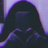

In [28]:
user = api.GetUser(user_id = uid)
# user = twt.user
Image(user.profile_image_url_https)

### User Profile ###

{{ user.screen_name }} &emsp; &emsp; &emsp; {{ datetime.strptime(user.created_at, '%a %b %d %H:%M:%S +0000 %Y').strftime("%A %d %b %Y") }}
_ _ _ _

follower: {{ user.followers_count }} &emsp; friends: {{ user.friends_count }} / location {{ user.location }}